In [1]:
import numpy as np
from chaos_game import *
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [2]:
params = {
    'figure.figsize': (11,28),
}
plt.rcParams.update(params)

# Number of points to construct
N = int(1e5)
# size of the final image
size = 1024
# interval between frames when rendering the animation
interval = 100

In [3]:
def heart_func_plus(x):
    return (x ** (2/3) + np.sqrt(1-x*x)+1)/3
def heart_func_minus(x):
    return (x ** (2/3) - np.sqrt(1-x*x)+1)/3

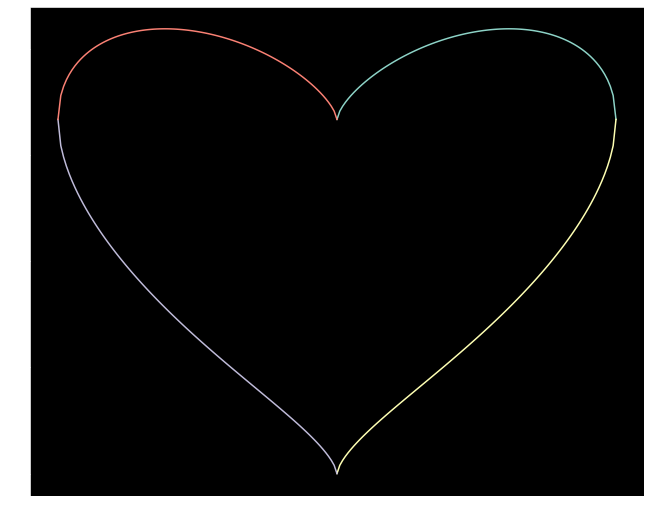

In [4]:
figure = plt.figure(figsize=(11,9))
x = np.linspace(0,1,100)
plt.plot((x+1)/2, heart_func_plus(x))
plt.plot((x+1)/2, heart_func_minus(x))
plt.plot((-x+1)/2, heart_func_minus(x))
plt.plot((-x+1)/2, heart_func_plus(x))
plt.show()

In [5]:
x = np.linspace(0,1,20)

heart_poly = \
list(map(lambda u: ((u+1)/2, heart_func_plus(u)), x)) +\
list(map(lambda u: ((u+1)/2, heart_func_minus(u)), x)) +\
list(map(lambda u: ((-u+1)/2, heart_func_minus(u)), x)) +\
list(map(lambda u: ((-u+1)/2, heart_func_plus(u)), x))

## Sierpinski triangle

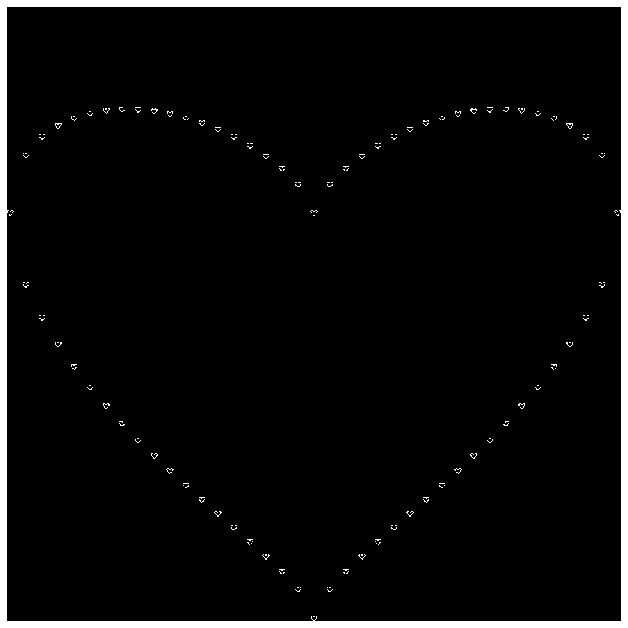

In [6]:
w = 0.99

x, y = play_game(N, w, heart_poly)
im = render_image(x, y, size)
plt.axis('off')
plt.imshow(im)

## Animated Sierpinski heart 

In [7]:
fig = plt.figure()

frames = 80
w = np.linspace(0.6, 0.99, frames)

x, y = play_game(N, w[0], heart_poly)
im = plt.imshow(render_image(x, y, size), interpolation='none', animated=True)

def init():
    x, y = play_game(N, w[0], heart_poly)
    im.set_data( render_image(x, y, size))
    return [im]

def animate(i):
    x, y = play_game(N, w[i], heart_poly)
    im.set_data( render_image(x, y, size))
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=frames, interval=interval, 
                               blit=True, repeat=True)
plt.axis('off')
plt.close()

In [8]:
anim.save('sierpinski_hearts.gif', writer='imagemagick', fps=30)